<a href="https://colab.research.google.com/github/VictorOmondi1997/visualizing_students_dataset/blob/master/visualizing_students_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# exploring data from students in secondary school. 

We have a lot of information about each student like their age, where they live, their study habits and their extracurricular activities.

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/3996/datasets/61e08004fef1a1b02b62620e3cd2533834239c90/student-alcohol-consumption.csv')
df.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


the relationship between the number of absences they have in school and their final grade in the course, segmented by where the student lives (rural vs. urban area).

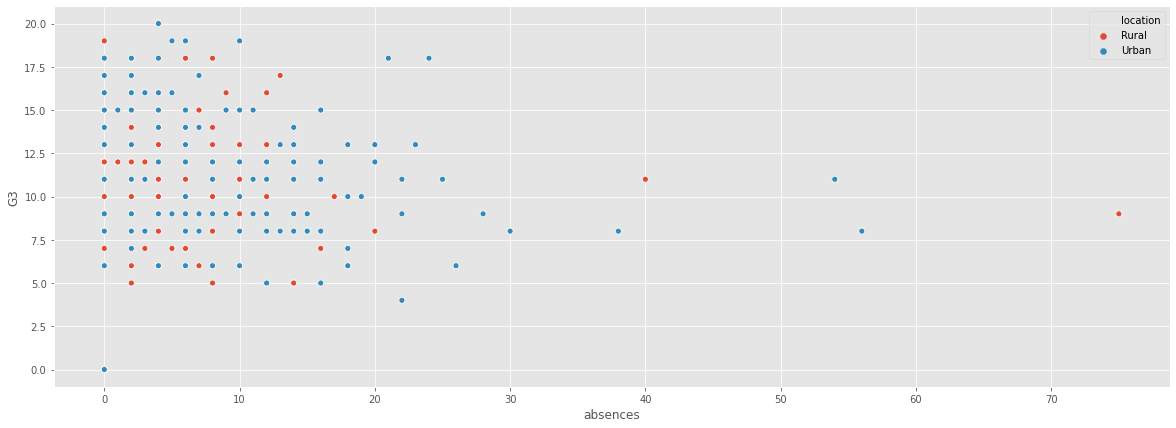

In [3]:
fig, ax = plt.subplots(figsize=(20,7))
sns.scatterplot(x='absences', y='G3', data=df, hue='location', hue_order=['Rural', 'Urban'], ax=ax)
plt.show()

 It looks like students with higher absenses tend to have lower grades in both rural and urban areas.

  How many students live in urban vs. rural areas, and does this vary based on what school the student attends? Let's make a count plot with subgroups to find out.

  The "school" column indicates the initials of which school the student attended - either "GP" or "MS".

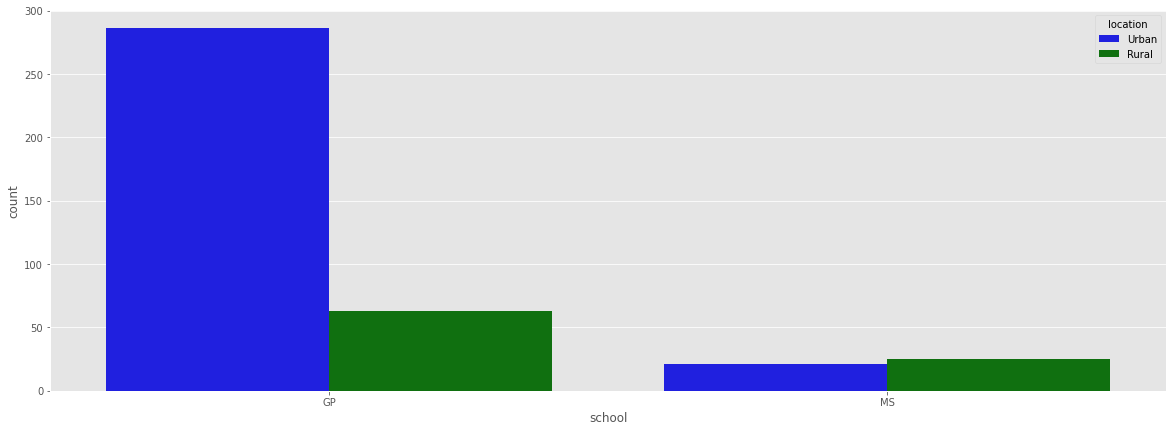

In [4]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(ax=ax,x='school', data=df, hue='location',palette={'Rural':'green', 'Urban':'blue'})
plt.show()

Students at GP tend to come from an urban location, but students at MS are more evenly split.

We've seen that students with more absences (`"absences"`) tend to have lower final grades (`"G3"`). **Does this relationship hold regardless of how much time students study each week?**

To answer this, we'll look at the relationship between the number of absences that a student has in school and their final grade in the course, creating separate subplots based on each student's weekly study time ("study_time").

# The relationship between the number of asences that a student has in school and their final grade.

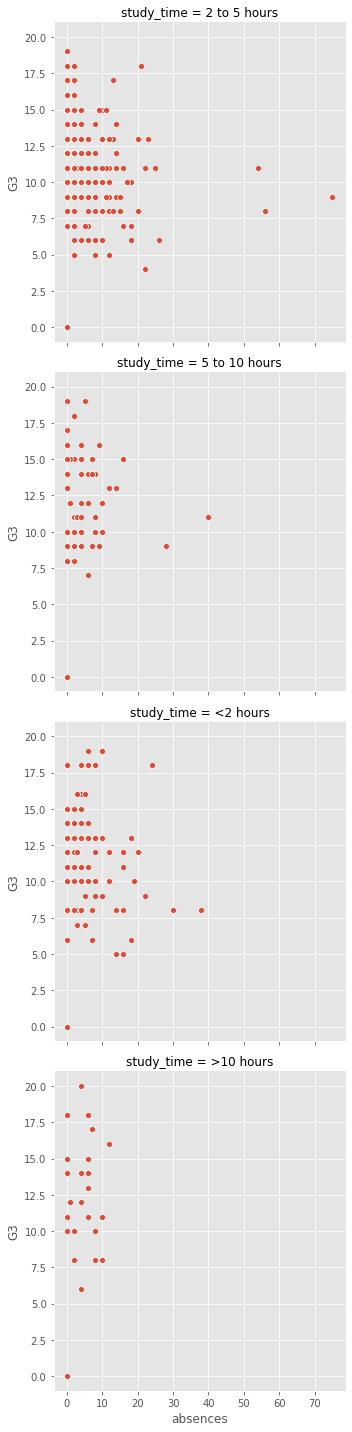

In [5]:
sns.relplot(x='absences', y='G3', data=df, kind='scatter', row='study_time')
plt.show()

does a student's first semester grade (`"G1"`) tend to correlate with their final grade (`"G3"`)?

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some students receive extra educational support from their school (`"schoolsup"`) or from their family (`"famsup"`), which could result in higher grades. Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

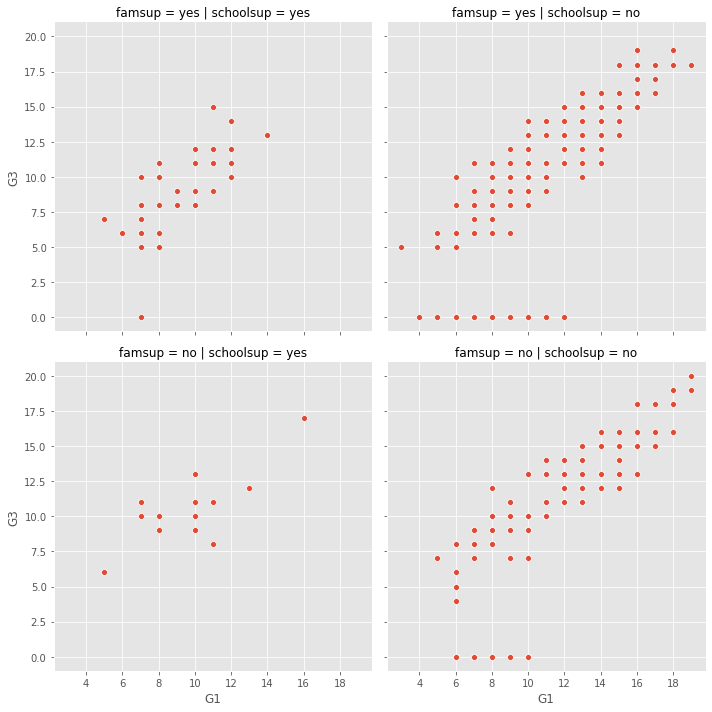

In [6]:
sns.relplot(data=df, kind='scatter', x='G1', y='G3',col='schoolsup', col_order=['yes', 'no'], row='famsup', row_order=['yes', 'no'])
plt.show()

It looks like the first semester grade does correlate with the final grade, regardless of what kind of support the student received.

The "study_time" variable records each student's reported weekly study time as one of the following categories: "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours". Do students who report higher amounts of studying tend to get better final grades? Let's compare the average final grade among students in each category using a bar plot.

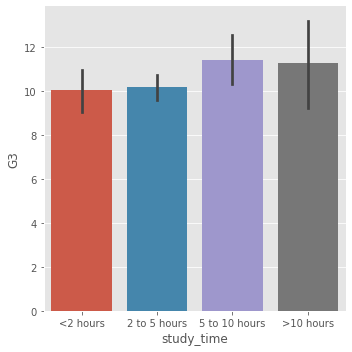

In [7]:
sns.catplot(data=df, kind='bar', x='study_time', y='G3', order=["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])
plt.show()

Students in our sample who studied more have a slightly higher average grade, but it's not a strong relationship.

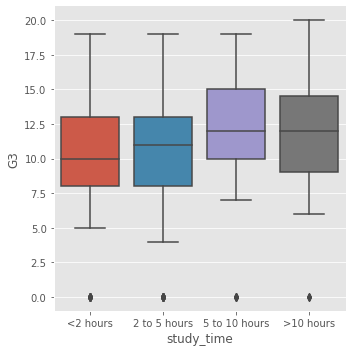

In [9]:
sns.catplot(data=df, kind='box', x='study_time', y='G3', order=["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"])
plt.show()

***Interpretation:***

* The median grade among students studying less than 2 hours is 10.0.

# comparing the distribution of final grades ("G3") between students who have internet access at home and those who don't

To do this, we'll use the "internet" variable, which is a binary (yes/no) indicator of whether the student has internet access at home.

Since internet may be less accessible in rural areas, we'll add subgroups based on where the student lives. For this, we can use the "location" variable, which is an indicator of whether a student lives in an urban ("Urban") or rural ("Rural") location.

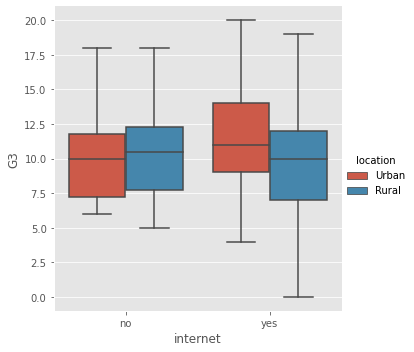

In [10]:
sns.catplot(data=df, kind='box', x='internet', y='G3', hue='location', sym='')
plt.show()


The median grades are quite similar between each group, but the spread of the distribution looks larger among students who have internet access.

#  comparing the distribution of final grades ("G3") between students who are in a romantic relationship and those that are not

We'll use the "romantic" variable, which is a yes/no indicator of whether the student is in a romantic relationship.

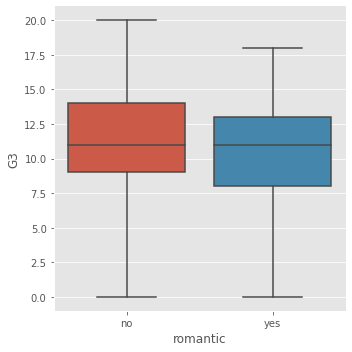

In [13]:
sns.catplot(data=df, kind='box', x='romantic', y='G3', whis=[0,100])
plt.show()

The median grade is the same between these two groups, but the max grade is higher among students who are not in a romantic relationship.

does the quality of the student's family relationship influence the number of absences the student has in school? Here, we'll use the "famrel" variable, which describes the quality of a student's family relationship from 1 (very bad) to 5 (very good).

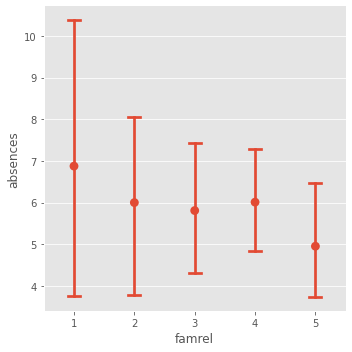

In [17]:
sns.catplot(data=df, kind='point', x='famrel', y='absences', capsize=0.2, join=False)
plt.show()

 While the average number of absences is slightly smaller among students with higher-quality family relationships, the large confidence intervals tell us that we can't be sure there is an actual association here.

is being in a romantic relationship associated with higher or lower school attendance? And does this association differ by which school the students attend? Let's find out using a point plot.

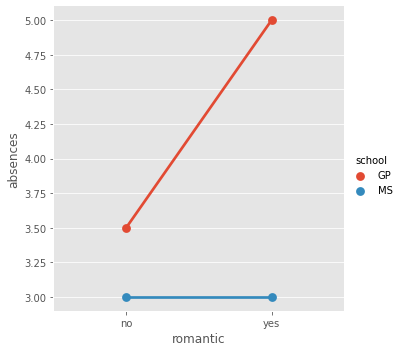

In [21]:
sns.catplot(data=df, kind='point', x='romantic', y='absences', hue='school', ci=None, estimator=np.median)
plt.show()

 It looks like students in romantic relationships have a higher average and median number of absences in the GP school, but this association does not hold for the MS school.